<p style="background-color:firebrick;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>EDA Projesi - Auto Sales</b></p>

<b>İçindekiler:</b>
<ul>
<li><a href="#import-library">Kütüphanelerin Yüklenmesi</a></li>
<li><a href="#loading-dataset">Veri Setinin Yüklenmesi</a></li>
<li><a href="#understanding-dataset">Veri Setini Anlama</a></li>
<li><a href="#organizing-columns">Sütunların Düzenlenmesi</a></li>
<li><a href="#nan-values">NaN Değerler</a></li>
<li><a href="#data-visualization">Veri Görselleştirme</a></li>
</ul>

<a id='import-library'></a>
# <font color='firebrick'> <b>Kütüphanelerin Yüklenmesi</b><font color='black'> 

In [4]:
# ! pip install squarify

In [5]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import squarify # for treemap

import missingno as msno
import plotly.express as px

from skimpy import skim

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

<a id='loading-dataset'></a>
# <font color='firebrick'> <b>Veri Setinin Yüklenmesi</b><font color='black'> 

In [7]:
df0 = pd.read_csv("Auto Sales data.csv")
df = df0.copy()

In [8]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,24/02/2018,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,07/05/2018,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,01/07/2018,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,25/08/2018,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,28/10/2018,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium


In [9]:
df.sample(5)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
320,10359,49,62.09,5,3042.41,15/12/2019,489,Shipped,Classic Cars,173,S12_3891,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Medium
253,10142,33,151.08,13,4985.64,08/08/2018,916,Shipped,Classic Cars,151,S12_3148,Mini Gifts Distributors Ltd.,4155551450,5677 Strong St.,San Rafael,97562,USA,Nelson,Valarie,Medium
316,10314,36,192.05,4,6913.80,22/10/2019,539,Shipped,Classic Cars,173,S12_3891,Heintze Collectables,86 21 3555,Smagsloget 45,Aaarhus,8200,Denmark,Ibsen,Palle,Medium
391,10300,23,122.07,2,2807.61,04/10/2018,997,Shipped,Classic Cars,115,S12_4675,"Blauer See Auto, Co.",+49 69 66 90 2555,Lyonerstr. 34,Frankfurt,60528,Germany,Keitel,Roland,Small
22,10403,24,101.44,7,2434.56,08/04/2020,76,Shipped,Motorcycles,95,S10_1678,"UK Collectables, Ltd.",(171) 555-2282,Berkeley Gardens 12 Brewery,Liverpool,WX1 6LT,UK,Devon,Elizabeth,Small


<a id='understanding-dataset'></a>
# <font color='firebrick'> <b>Veri Setini Anlama</b><font color='black'> 

- **ORDERNUMBER:** Bu sütun, her siparişe atanan benzersiz kimlik numarasını temsil eder. 
- **QUANTITYORDERED:** Her siparişte sipariş edilen ürün adedini belirtir. 
- **PRICEEACH:** Bu sütun, siparişteki her bir ürünün fiyatını belirtir. 
- **ORDERLINENUMBER:** Sipariş içerisindeki her kalemin satır numarasını temsil eder. 
- **SALES:** Bu sütun, sipariş adedi ile ürün fiyatının çarpılmasıyla hesaplanan her siparişe ait toplam satış tutarını gösterir. 
- **ORDERDATE:** Siparişin verildiği tarihi belirtir. 
- **DAYS_SINCE_LASTORDER:** Bu sütun, her müşterinin son siparişinden bu yana geçen gün sayısını temsil eder. Müşteri satın alma modellerini analiz etmek için kullanılabilir.
- **STATUS:** Siparişin "Gönderildi", "İşlemde", "İptal Edildi", "İtiraz Edildi", "Beklemede" veya "Çözümlendi" gibi durumunu belirtir. 
- **PRODUCTLINE:** Bu sütun, her bir öğenin ait olduğu ürün grubu kategorilerini belirtir. 
- **MSRP:** Üreticinin Önerilen Perakende Fiyatını ifade eder ve her ürün için önerilen satış fiyatını temsil eder.
- **PRODUCTCODE:** Bu sütun her ürüne atanan benzersiz kodu temsil eder. 
- **CUSTOMERNAME:** Siparişi veren müşterinin adını belirtir. 
- **PHONE:** Bu sütunda müşterinin iletişim telefon numarası yer alır. 
- **ADDRESSLINE1:** Müşterinin adresinin ilk satırını temsil eder. 
- **CITY:** Bu sütun müşterinin bulunduğu şehri belirtir. 
- **POSTALCODE:** Müşterinin adresine bağlı posta kodunu veya ZIP kodunu belirtir. 
- **COUNTRY:** Bu sütun müşterinin bulunduğu ülkeyi belirtir. 
- **CONTACTLASTNAME:** Müşteri ile ilişkili ilgili kişinin soyadını temsil eder. 
- **CONTACTFIRSTNAME:** Bu sütun müşteriyle ilişkili ilgili kişinin adını belirtir. 
- **DEALSIZE:** "Küçük", "Orta" veya "Büyük" kategorilerindeki işlem veya emrin boyutunu belirtir.

In [12]:
df.shape

(2747, 20)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ORDERNUMBER           2747 non-null   int64  
 1   QUANTITYORDERED       2747 non-null   int64  
 2   PRICEEACH             2747 non-null   float64
 3   ORDERLINENUMBER       2747 non-null   int64  
 4   SALES                 2747 non-null   float64
 5   ORDERDATE             2747 non-null   object 
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64  
 7   STATUS                2747 non-null   object 
 8   PRODUCTLINE           2747 non-null   object 
 9   MSRP                  2747 non-null   int64  
 10  PRODUCTCODE           2747 non-null   object 
 11  CUSTOMERNAME          2747 non-null   object 
 12  PHONE                 2747 non-null   object 
 13  ADDRESSLINE1          2747 non-null   object 
 14  CITY                  2747 non-null   object 
 15  POSTALCODE           

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ORDERNUMBER,2747.0,10259.761558,91.877521,10100.00,10181.000,10264.00,10334.500,10425.00
QUANTITYORDERED,2747.0,35.103021,9.762135,6.00,27.000,35.00,43.000,97.00
PRICEEACH,2747.0,101.098952,42.042549,26.88,68.745,95.55,127.100,252.87
ORDERLINENUMBER,2747.0,6.491081,4.230544,1.00,3.000,6.00,9.000,18.00
SALES,2747.0,3553.047583,1838.953901,482.13,2204.350,3184.80,4503.095,14082.80
DAYS_SINCE_LASTORDER,2747.0,1757.085912,819.280576,42.00,1077.000,1761.00,2436.500,3562.00
MSRP,2747.0,100.691664,40.114802,33.00,68.000,99.00,124.000,214.00


In [15]:
df.describe(include= 'object').T

,count,unique,top,freq
ORDERDATE,2747,246,14/11/2018,38
STATUS,2747,6,Shipped,2541
PRODUCTLINE,2747,7,Classic Cars,949
PRODUCTCODE,2747,109,S18_3232,51
CUSTOMERNAME,2747,89,Euro Shopping Channel,259
PHONE,2747,88,(91) 555 94 44,259
ADDRESSLINE1,2747,89,"C/ Moralzarzal, 86",259
CITY,2747,71,Madrid,304
POSTALCODE,2747,73,28034,259
COUNTRY,2747,19,USA,928


In [16]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 2747   │ │ string      │ 13    │                                                          │
│ │ Number of columns │ 20     │ │ int32       │ 5     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name             ┃ NA  ┃ NA %  ┃ mean   ┃ sd     ┃ p0     ┃ p25    ┃ p50   ┃ p75   ┃ p100  ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ ORDERNUMBER             │   0 │     0 │  10260 │  91.88 │  10100 │  10180 │ 10260 │ 10330 │ 10420 │ ▇▇▆▇▇▆ │  │
│ │ QUANTITYORDERED         │   0 │     0 │   35.1 │  9.762 │      6 │     27 │    35 │    43 │    97 │  ▁▇▇   │  │
│ │ PRICEEACH               │   0 │     0 │  101.1 │  42.04 │  26.88 │  68.75 │ 95.55 │ 127.1 │ 252.9 │ ▅▇▆▃▁  │  │
│ │ ORDERLINENUMBER         │   0 │     0 │  6.491 │  4.231 │      1 │      3 │     6 │     9 │    18 │ ▇▇▅▃▂▁ │  │
│ │ SALES                   │   0 │     0 │   3553 │   1839 │  482.1 │   2204 │  3185 │  4503 │ 14080 │  ▇▇▃▁  │  │
│ │ DAYS_SINCE_LASTORDER    │   0 │     0 │   1757 │  819.3 │     42 │   1077 │  1761 │  2436 │  3562 │ ▃▇▇▇▇▂ │  │
│ │ MSRP                    │   0 │     0 │  100.7 │  40.11 │     33 │     68 │    99 │   124 │   214 │ ▆▇▇▅▂▁ │  │
│ └─────────────────────────┴─────┴───────┴────────┴────────┴────────┴────────┴───────┴───────┴───────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                      ┃ NA     ┃ NA %      ┃ words per row              ┃ total words           ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ ORDERDATE                        │      0 │         0 │                          1 │                  2747 │  │
│ │ STATUS                           │      0 │         0 │                          1 │                  2832 │  │
│ │ PRODUCTLINE                      │      0 │         0 │                        1.8 │                  4865 │  │
│ │ PRODUCTCODE                      │      0 │         0 │                          1 │                  2747 │  │
│ │ CUSTOMERNAME                     │      0 │         0 │                        3.1 │                  8496 │  │
│ │ PHONE                            │      0 │         0 │                          2 │                  5517 │  │
│ │ ADDRESSLINE1                     │      0 │         0 │                        3.5 │                  9478 │  │
│ │ CITY                             │      0 │         0 │                        1.2 │                  3274 │  │
│ │ POSTALCODE                       │      0 │         0 │                        1.1 │                  3097 │  │
│ │ COUNTRY                          │      0 │         

In [17]:
df.duplicated().sum()

0

In [18]:
df.isnull().sum()

ORDERNUMBER             0
QUANTITYORDERED         0
PRICEEACH               0
ORDERLINENUMBER         0
SALES                   0
ORDERDATE               0
DAYS_SINCE_LASTORDER    0
STATUS                  0
PRODUCTLINE             0
MSRP                    0
PRODUCTCODE             0
CUSTOMERNAME            0
PHONE                   0
ADDRESSLINE1            0
CITY                    0
POSTALCODE              0
COUNTRY                 0
CONTACTLASTNAME         0
CONTACTFIRSTNAME        0
DEALSIZE                0
dtype: int64

<a id='organizing-columns'></a>
# <font color='firebrick'> <b>Sütunların Düzenlenmesi</b><font color='black'> 

In [20]:
df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'DAYS_SINCE_LASTORDER', 'STATUS', 'PRODUCTLINE',
       'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1', 'CITY',
       'POSTALCODE', 'COUNTRY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [21]:
df.columns = df.columns.str.lower()
df.columns

Index(['ordernumber', 'quantityordered', 'priceeach', 'orderlinenumber',
       'sales', 'orderdate', 'days_since_lastorder', 'status', 'productline',
       'msrp', 'productcode', 'customername', 'phone', 'addressline1', 'city',
       'postalcode', 'country', 'contactlastname', 'contactfirstname',
       'dealsize'],
      dtype='object')

In [22]:
df.columns = ['order_number', 'quantity_ordered', 'price_each', 'order_line_number',
       'total_price', 'order_date', 'days_since_lastorder', 'status', 'product_line',
       'msrp', 'product_code', 'customer_name', 'phone', 'address_line1', 'city',
       'postal_code', 'country', 'contact_lastname', 'contact_firstname',
       'deal_size']
df.columns

Index(['order_number', 'quantity_ordered', 'price_each', 'order_line_number',
       'total_price', 'order_date', 'days_since_lastorder', 'status',
       'product_line', 'msrp', 'product_code', 'customer_name', 'phone',
       'address_line1', 'city', 'postal_code', 'country', 'contact_lastname',
       'contact_firstname', 'deal_size'],
      dtype='object')

## <font color='indianred'> <b>"order_number" Sütunu</b><font color='black'> 

In [24]:
df.order_number.nunique()

298

In [25]:
df.order_number.unique()

array([10107, 10121, 10134, 10145, 10168, 10180, 10188, 10211, 10223,
       10237, 10251, 10263, 10275, 10285, 10299, 10309, 10318, 10329,
       10341, 10361, 10375, 10388, 10403, 10417, 10103, 10112, 10126,
       10140, 10150, 10163, 10174, 10183, 10194, 10206, 10215, 10228,
       10245, 10258, 10270, 10280, 10291, 10304, 10312, 10322, 10347,
       10357, 10369, 10391, 10411, 10424, 10120, 10210, 10236, 10298,
       10308, 10339, 10374, 10402, 10362, 10105, 10119, 10129, 10143,
       10155, 10167, 10178, 10186, 10197, 10222, 10248, 10261, 10273,
       10283, 10295, 10307, 10316, 10325, 10337, 10350, 10359, 10373,
       10395, 10400, 10414, 10114, 10164, 10175, 10207, 10217, 10229,
       10259, 10281, 10305, 10313, 10334, 10370, 10425, 10108, 10122,
       10135, 10147, 10169, 10181, 10191, 10203, 10225, 10238, 10253,
       10266, 10276, 10287, 10300, 10310, 10320, 10363, 10389, 10419,
       10117, 10127, 10142, 10153, 10165, 10176, 10185, 10196, 10208,
       10220, 10231,

**order_number sütunu uygun görünüyor.**

## <font color='indianred'> <b>"quantity_ordered" Sütunu</b><font color='black'> 

In [28]:
df.quantity_ordered.nunique()

58

In [29]:
df.quantity_ordered.unique()

array([30, 34, 41, 45, 36, 29, 48, 37, 23, 28, 46, 42, 20, 21, 24, 66, 26,
       38, 47, 35, 32, 40, 50, 39, 27, 22, 44, 31, 33, 49, 43, 56, 25, 64,
       19, 12, 55, 10, 54, 97, 61, 51, 59, 76,  6, 15, 60, 65, 58, 16, 70,
       13, 18, 52, 11, 62, 85, 77], dtype=int64)

**quantity_ordered sütunu uygun görünüyor.**

## <font color='indianred'> <b>"price_each" Sütunu</b><font color='black'> 

In [32]:
df.price_each.nunique()

1843

In [33]:
df.price_each.dtype

dtype('float64')

**price_each sütunu uygun görünüyor..**

## <font color='indianred'> <b>"order_line_number" Sütunu</b><font color='black'> 

In [36]:
df.order_line_number.nunique()

18

In [37]:
df.order_line_number.unique()

array([ 2,  5,  6,  1,  9, 14,  7, 13, 12,  4, 11,  8,  3, 10, 15, 17, 16,
       18], dtype=int64)

**order_line_number sütunu uygun görünüyor.**

## <font color='indianred'> <b>"total_price" Sütunu</b><font color='black'> 

In [40]:
df.total_price.nunique()

2690

In [41]:
df.total_price.dtype

dtype('float64')

**total_price sütunu uygun görünüyor.**

## <font color='indianred'> <b>"order_date" Sütunu</b><font color='black'> 

In [44]:
df.order_date.nunique()

246

In [45]:
df.order_date.dtype

dtype('O')

In [46]:
# order_date sütununun dtype'ını datetime olarak değiştirme
df['order_date'] = pd.to_datetime(df['order_date'], dayfirst=True, errors='coerce')

## <font color='indianred'> <b>"days_since_lastorder" Sütunu</b><font color='black'> 

In [48]:
df.days_since_lastorder.nunique()

1832

In [49]:
df.days_since_lastorder.dtype

dtype('int64')

**days_since_lastorder sütunu uygun görünüyor.**

## <font color='indianred'> <b>"status" Sütunu</b><font color='black'> 

In [52]:
df.status.nunique()

6

In [53]:
df.status.unique()

array(['Shipped', 'Disputed', 'In Process', 'Cancelled', 'On Hold',
       'Resolved'], dtype=object)

In [54]:
df['status'] = df['status'].str.strip()

## <font color='indianred'> <b>"product_line" Sütunu</b><font color='black'> 

In [56]:
df.product_line.nunique()

7

In [57]:
df.product_line.unique()

array(['Motorcycles', 'Classic Cars', 'Trucks and Buses', 'Vintage Cars',
       'Planes', 'Ships', 'Trains'], dtype=object)

In [58]:
df['product_line'] = df['product_line'].str.strip()

## <font color='indianred'> <b>"msrp" Sütunu</b><font color='black'> 

In [60]:
df.msrp.nunique()

80

In [61]:
df.msrp.unique()

array([ 95, 214, 118, 193, 136, 147, 194, 207, 150, 151, 117, 173,  79,
       115, 116, 141, 102,  53, 124, 157, 170,  77, 142, 163,  60, 122,
       127,  84, 168, 132, 101,  62,  86, 104, 169, 100,  80,  99, 146,
       105, 143,  92,  87, 121,  50, 148,  71,  73,  57, 112, 109,  33,
        76,  44,  69,  90,  35,  68,  37,  88,  85,  61,  65, 107,  83,
       140,  41,  97,  72,  96,  40,  54,  64,  43,  58,  81,  66,  91,
        74,  49], dtype=int64)

**msrp sütunu uygun görünüyor.**

## <font color='indianred'> <b>"product_code" Sütunu</b><font color='black'> 

In [64]:
df.product_code.nunique()

109

In [65]:
df.product_code.unique()

array(['S10_1678', 'S10_1949', 'S10_2016', 'S10_4698', 'S10_4757',
       'S10_4962', 'S12_1099', 'S12_1108', 'S12_1666', 'S12_2823',
       'S12_3148', 'S12_3380', 'S12_3891', 'S12_3990', 'S12_4473',
       'S12_4675', 'S18_1097', 'S18_1129', 'S18_1342', 'S18_1367',
       'S18_1589', 'S18_1662', 'S18_1749', 'S18_1889', 'S18_1984',
       'S18_2238', 'S18_2248', 'S18_2319', 'S18_2325', 'S18_2432',
       'S18_2581', 'S18_2625', 'S18_2795', 'S18_2870', 'S18_2949',
       'S18_2957', 'S18_3029', 'S18_3136', 'S18_3140', 'S18_3232',
       'S18_3259', 'S18_3278', 'S18_3320', 'S18_3482', 'S18_3685',
       'S18_3782', 'S18_3856', 'S18_4027', 'S18_4409', 'S18_4522',
       'S18_4600', 'S18_4668', 'S18_4721', 'S18_4933', 'S24_1046',
       'S24_1444', 'S24_1578', 'S24_1628', 'S24_1785', 'S24_1937',
       'S24_2000', 'S24_2011', 'S24_2022', 'S24_2300', 'S24_2360',
       'S24_2766', 'S24_2840', 'S24_2841', 'S24_2887', 'S24_2972',
       'S24_3151', 'S24_3191', 'S24_3371', 'S24_3420', 'S24_34

In [66]:
df['product_code'] = df['product_code'].str.strip()

## <font color='indianred'> <b>"customer_name" Sütunu</b><font color='black'> 

In [68]:
df.customer_name.nunique()

89

In [69]:
df.customer_name.unique()

array(['Land of Toys Inc.', 'Reims Collectables', 'Lyon Souveniers',
       'Toys4GrownUps.com', 'Technics Stores Inc.',
       'Daedalus Designs Imports', 'Herkku Gifts', 'Auto Canal Petit',
       'Australian Collectors, Co.', 'Vitachrome Inc.',
       'Tekni Collectables Inc.', 'Gift Depot Inc.', 'La Rochelle Gifts',
       "Marta's Replicas Co.", 'Toys of Finland, Co.',
       'Baane Mini Imports', 'Diecast Classics Inc.',
       'Salzburg Collectables', 'Souveniers And Things Co.',
       'FunGiftIdeas.com', 'UK Collectables, Ltd.',
       'Euro Shopping Channel', 'Volvo Model Replicas, Co',
       'Corrida Auto Replicas, Ltd', 'Dragon Souveniers, Ltd.',
       'Classic Legends Inc.', 'Australian Gift Network, Co',
       'Classic Gift Ideas, Inc', 'Saveley & Henriot, Co.',
       'Canadian Gift Exchange Network', 'West Coast Collectables Co.',
       'Cambridge Collectables Co.', 'Super Scale Inc.',
       'Tokyo Collectables, Ltd', 'Amica Models & Co.',
       'Scandinavian Gift

In [70]:
df['customer_name'] = df['customer_name'].str.strip()

## <font color='indianred'> <b>"city" Sütunu</b><font color='black'> 

In [72]:
df.city.nunique()

71

In [73]:
df.city.unique()

array(['NYC', 'Reims', 'Paris', 'Pasadena', 'Burlingame', 'Lille',
       'Bergen', 'Melbourne', 'Newark', 'Bridgewater', 'Nantes',
       'Cambridge', 'Helsinki', 'Stavern', 'Allentown', 'Salzburg',
       'Chatswood', 'New Bedford', 'Liverpool', 'Madrid', 'Lule',
       'Singapore', 'South Brisbane', 'Philadelphia', 'Lyon', 'Vancouver',
       'Burbank', 'New Haven', 'Minato-ku', 'Torino', 'Boras',
       'Versailles', 'San Rafael', 'Nashua', 'Brickhaven', 'North Sydney',
       'Montreal', 'Osaka', 'White Plains', 'Kobenhavn', 'London',
       'Toulouse', 'Barcelona', 'San Diego', 'Bruxelles', 'Tsawassen',
       'Boston', 'Cowes', 'Oulu', 'San Jose', 'Graz', 'Makati City',
       'Marseille', 'Koln', 'Gensve', 'Reggio Emilia', 'Frankfurt',
       'Espoo', 'Dublin', 'Manchester', 'Aaarhus', 'Glendale', 'Sevilla',
       'Brisbane', 'Strasbourg', 'Las Vegas', 'Oslo', 'Bergamo',
       'Glen Waverly', 'Munich', 'Charleroi'], dtype=object)

In [74]:
df['city'] = df['city'].str.strip()

## <font color='indianred'> <b>"country" Sütunu</b><font color='black'> 

In [76]:
df.country.nunique()

19

In [77]:
df.country.unique()

array(['USA', 'France', 'Norway', 'Australia', 'Finland', 'Austria', 'UK',
       'Spain', 'Sweden', 'Singapore', 'Canada', 'Japan', 'Italy',
       'Denmark', 'Belgium', 'Philippines', 'Germany', 'Switzerland',
       'Ireland'], dtype=object)

In [78]:
df['country'] = df['country'].str.strip()

## <font color='indianred'> <b>"contact_lastname & contact_firstname" Sütunları</b><font color='black'> 

In [80]:
df.contact_lastname.nunique()

76

In [81]:
df.contact_lastname.unique()

array(['Yu', 'Henriot', 'Da Cunha', 'Young', 'Hirano', 'Rance', 'Oeztan',
       'Perrier', 'Ferguson', 'Frick', 'Brown', 'King', 'Labrune',
       'Hernandez', 'Karttunen', 'Bergulfsen', 'Pipps', 'Huxley',
       'Benitez', 'Devon', 'Freyre', 'Berglund', 'Sommer', 'Natividad',
       'Calaghan', 'Cervantes', 'Saveley', 'Tannamuri', 'Thompson',
       'Tseng', 'Murphy', 'Shimamura', 'Accorti', 'Larsson', 'Tonini',
       'Nelson', "O'Hara", 'Fresnisre', 'Kentary', 'Schmitt', 'Petersen',
       'Tam', 'Roulet', 'Hardy', 'Saavedra', 'Dewey', 'Lincoln',
       'Yoshido', 'Bennett', 'Koskitalo', 'Bertrand', 'Mendel', 'Franco',
       'Victorino', 'Cruz', 'Lebihan', 'Pfalzheim', 'Holz', 'Moroni',
       'Barajas', 'Keitel', 'Suominen', 'Cassidy', 'Fernandez',
       'Ashworth', 'Ibsen', 'Kuo', 'Roel', 'Taylor', 'Citeaux', 'Klaeboe',
       'Rovelli', 'Connery', 'Lewis', 'Donnermeyer', 'Cartrain'],
      dtype=object)

In [82]:
df['contact_lastname'] = df['contact_lastname'].str.strip()

In [83]:
df.contact_firstname.nunique()

72

In [84]:
df.contact_firstname.unique()

array(['Kwai', 'Paul', 'Daniel', 'Julie', 'Juri', 'Martine', 'Veysel',
       'Dominique', 'Peter', 'Michael', 'William', 'Janine', 'Marta',
       'Matti', 'Jonas', 'Kyung', 'Georg', 'Adrian', 'Violeta',
       'Elizabeth', 'Diego', 'Christina', 'Mart¡n', 'Eric', 'Maria',
       'Tony', 'Francisca', 'Mary', 'Yoshi', 'Steve', 'Leslie', 'Akiko',
       'Paolo', 'Valarie', 'Allen', 'Anna', 'Jean', 'Mory', 'Rosa',
       'Carine', 'Jytte', 'Ann', 'Wing C', 'Annette', 'Thomas', 'Eduardo',
       'Catherine', 'Helen', 'Pirkko', 'Sue', 'Marie', 'Roland', 'Wendy',
       'Arnold', 'Laurence', 'Henriette', 'Maurizio', 'Miguel', 'Kalle',
       'Jeff', 'Dean', 'Jesus', 'Victoria', 'Palle', 'Kee', 'Jose Pedro',
       'Frederique', 'Jan', 'Giovanni', 'Sean', 'Dan', 'Pascale'],
      dtype=object)

In [85]:
df['contact_firstname'] = df['contact_firstname'].str.strip()

Bu iki sütunu birleştirip **contact_fullname** adında yeni bir sütun oluşturalım.

In [87]:
df['contact_fullname'] = df['contact_firstname'] + ' ' + df['contact_lastname']

In [88]:
df = df.drop(columns=['contact_firstname', 'contact_lastname'])

## <font color='indianred'> <b>"deal_size" Sütunu</b><font color='black'> 

In [90]:
df.deal_size.nunique()

3

In [91]:
df.deal_size.unique()

array(['Small', 'Medium', 'Large'], dtype=object)

In [92]:
df['deal_size'] = df['deal_size'].str.strip()

## <font color='indianred'> <b>Gereksiz Sütunların Silinmesi</b><font color='black'> 

İstenirse **phone, address_line1 and postal_code sütunları** düzenlenebilir. Ancak bu projede bu sütunlar kullanılmayacak olduğundan bu sütunları veri setinden çıkarabiliriz.

In [95]:
df = df.drop(columns=['phone', 'address_line1', 'postal_code'])

In [96]:
df.columns

Index(['order_number', 'quantity_ordered', 'price_each', 'order_line_number',
       'total_price', 'order_date', 'days_since_lastorder', 'status',
       'product_line', 'msrp', 'product_code', 'customer_name', 'city',
       'country', 'deal_size', 'contact_fullname'],
      dtype='object')

In [97]:
df.sample(5)

,order_number,quantity_ordered,price_each,order_line_number,total_price,order_date,days_since_lastorder,status,product_line,msrp,product_code,customer_name,city,country,deal_size,contact_fullname
1323,10169,33,148.80,7,4910.40,2018-11-04,1898,Shipped,Classic Cars,148,S18_4721,"Anna's Decorations, Ltd",North Sydney,Australia,Medium,Anna O'Hara
1731,10407,59,98.65,5,5820.35,2020-04-22,1771,On Hold,Classic Cars,117,S24_2887,The Sharp Gifts Warehouse,San Jose,USA,Medium,Sue Frick
2733,10248,23,65.52,9,1506.96,2019-05-07,3124,Cancelled,Ships,54,S72_3212,Land of Toys Inc.,NYC,USA,Small,Kwai Yu
2265,10237,27,115.32,5,3113.64,2019-04-05,2688,Shipped,Motorcycles,102,S32_4485,Vitachrome Inc.,NYC,USA,Medium,Michael Frick
291,10310,24,129.18,8,3100.32,2019-10-16,520,Shipped,Classic Cars,117,S12_3380,"Toms Spezialitten, Ltd",Koln,Germany,Medium,Henriette Pfalzheim


<a id='nan-values'></a>
# <font color='firebrick'> <b>NaN Değerler</b><font color='black'> 

In [99]:
df.isnull().sum()

order_number            0
quantity_ordered        0
price_each              0
order_line_number       0
total_price             0
order_date              0
days_since_lastorder    0
status                  0
product_line            0
msrp                    0
product_code            0
customer_name           0
city                    0
country                 0
deal_size               0
contact_fullname        0
dtype: int64

**NaN değeri yoktur. Bu veri seti NaN değerleri açısından oldukça temizdir.**

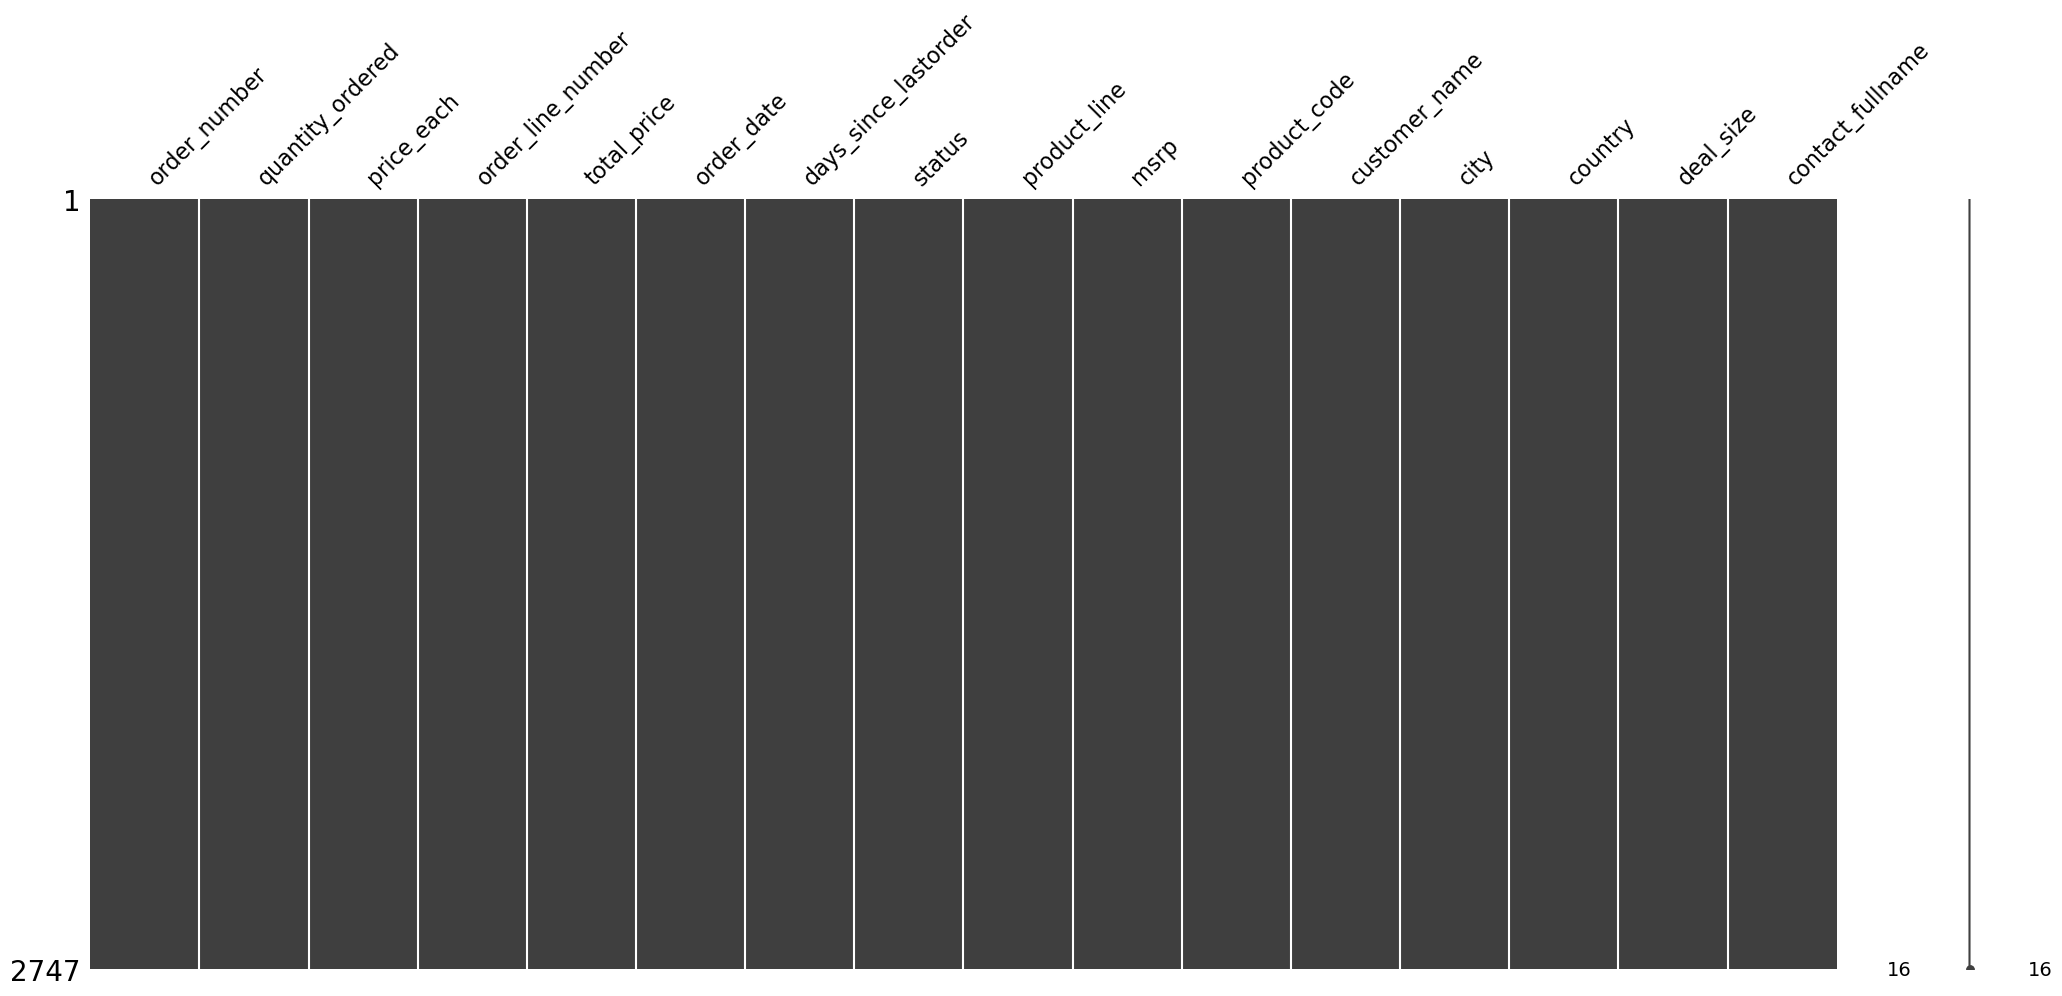

In [101]:
msno.matrix(df);

In [170]:
# veri setinin son halini csv dosyası olarak kaydetme
# df.to_csv("edited_data.csv", index= False)

<a id='data-visualization'></a>
# <font color='firebrick'> <b>Veri Görselleştirme</b><font color='black'> 

## <font color='indianred'> <b>Sipariş Durumlarının Dağılımı</b><font color='black'> 

In [172]:
status_rate = df['status'].value_counts() / len(df) * 100
status_rate = round(status_rate, 2)
status_rate

status
Shipped       92.50
Cancelled      2.18
Resolved       1.71
On Hold        1.60
In Process     1.49
Disputed       0.51
Name: count, dtype: float64

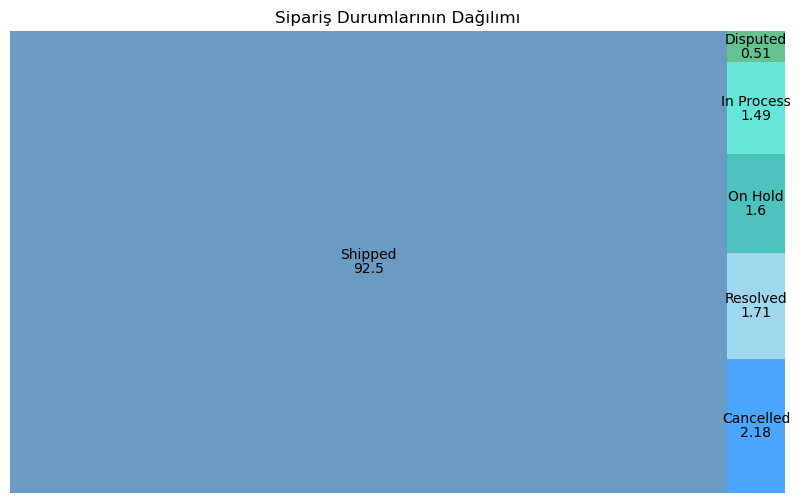

In [174]:
colors = ["steelblue", "dodgerblue", "skyblue", "lightseagreen", "turquoise", "mediumseagreen"]

# Treemap grafiği oluşturma
plt.figure(figsize=(10, 6))
squarify.plot(sizes=status_rate, label=status_rate.index, alpha=0.8, color= colors, value=status_rate)

# Başlık ekleme
plt.title('Sipariş Durumlarının Dağılımı')

# Grafiğin çıktı olarak gösterilmesi
plt.axis('off')
plt.show()

Bu Treemap grafiği, sipariş durumlarının dağılımını yüzde olarak gösterir. Buna göre **siparişlerin yaklaşık %92'sinin kargoya verildiği** görülmektedir.

## <font color='indianred'> <b>Sipariş Miktarı ve Toplam Satışlar Arasındaki İlişki</b><font color='black'> 

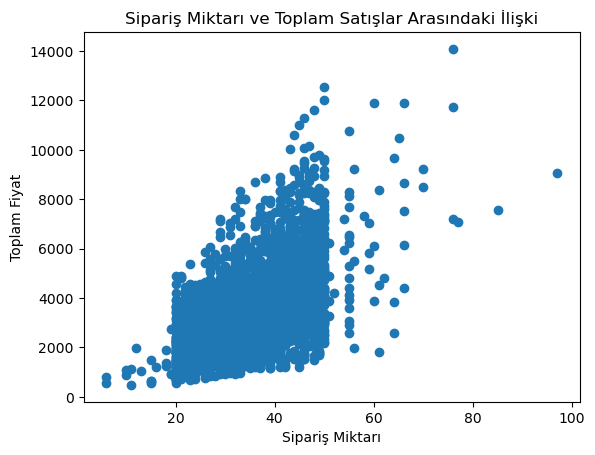

In [178]:
# Dağılım grafiği oluşturma
plt.scatter(df['quantity_ordered'], df['total_price'])

# Başlık ve eksenlerin isimlendirilmesi
plt.title('Sipariş Miktarı ve Toplam Satışlar Arasındaki İlişki')
plt.xlabel('Sipariş Miktarı')
plt.ylabel('Toplam Fiyat')

# Grafiğin çıktı olarak gösterilmesi
plt.show()

Bu dağılım grafiği, sipariş edilen miktar ile toplam fiyat arasındaki ilişkiyi gösterir. Genellikle sipariş miktarı arttıkça toplam fiyat da artma eğilimindedir. Ancak benzer miktarların toplam fiyatların değişmesine neden olduğu ve ürün fiyatlarındaki veya müşteri tercihlerindeki farklılıkları yansıtabilecek bazı veri noktaları vardır. Genel olarak grafik, sipariş edilen miktar ile toplam fiyat arasında pozitif bir korelasyon olduğunu göstermektedir.

## <font color='indianred'> <b>Ülkelere Göre Sipariş Dağılımı</b><font color='black'> 

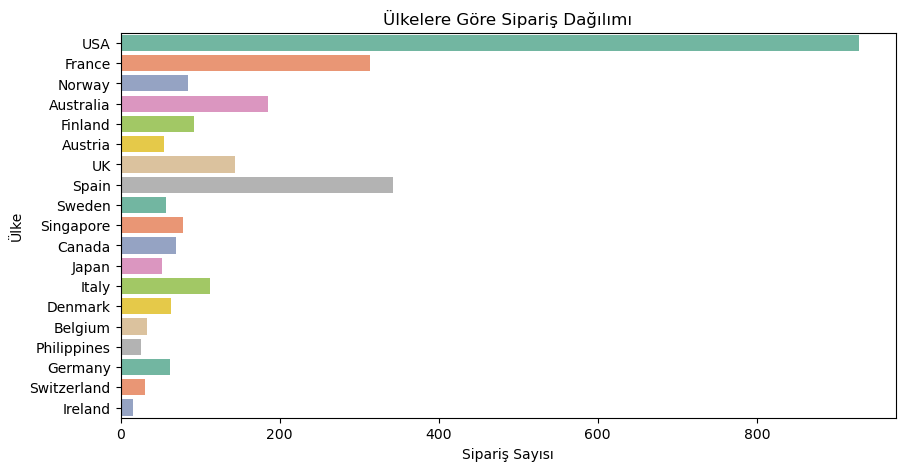

In [181]:
# Countplot grafiği oluşturma
fig, ax = plt.subplots(figsize = (10, 5))
sns.countplot(data = df, y = "country", palette = "Set2")

# Başlık ve eksenlerin isimlendirilmesi
plt.title('Ülkelere Göre Sipariş Dağılımı')
plt.xlabel('Sipariş Sayısı')
plt.ylabel('Ülke')

# Grafiğin çıktı olarak gösterilmesi
plt.show()

Bu çubuk grafiği, siparişlerin ülkeye göre dağılımını göstermektedir. **ABD'nin en fazla sipariş aldığı** ve onu **Fransa** ve **İspanya**'nın takip ettiği açıktır. Grafik, ABD'nin diğer ülkelerle karşılaştırıldığında en fazla siparişe katkıda bulunduğunu, diğer ülkelerin ise nispeten daha az siparişe sahip olduğunu gösteriyor.

## <font color='indianred'> <b>İlk 10 Şehir Bazında Toplam Satışlar</b><font color='black'> 

In [184]:
city_sales = df.groupby('city')['total_price'].sum()
top10_city_sales = city_sales.sort_values(ascending= False)[:10]

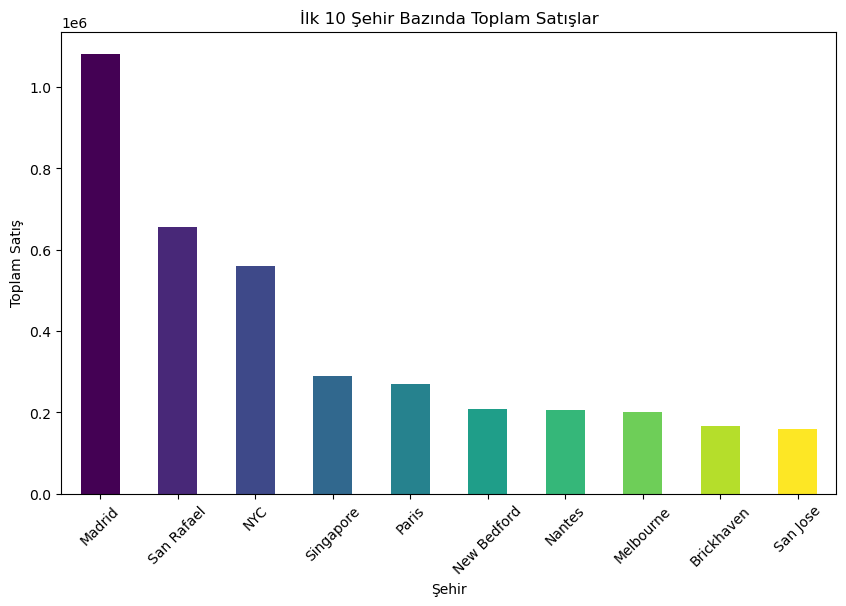

In [186]:
colors = cm.get_cmap('viridis', len(top10_city_sales))

# Bar grafiği oluşturma
top10_city_sales.plot(kind='bar', figsize=(10,6), color=colors(range(len(top10_city_sales))))

# Başlık ve eksenlerin isimlendirilmesi
plt.title('İlk 10 Şehir Bazında Toplam Satışlar')
plt.xlabel('Şehir')
plt.ylabel('Toplam Satış')
plt.xticks(rotation= 45)

# Grafiğin çıktı olarak gösterilmesi
plt.show()

Bu grafik farklı şehirlerdeki toplam satış rakamlarını göstermektedir. **Madrid yaklaşık 1 milyon satışla başı çekiyor ve onu San Rafael, New York City (NYC) ve Singapur izliyor.** Diğer şehirlerde satışlar önemli ölçüde düşük görünüyor. Özellikle San Jose, Brickhaven ve Melbourne çok daha küçük satış rakamlarıyla listenin son sıralarında yer alıyor. **Bu, Madrid'in satış hacmi açısından baskın bir şehir olduğunu ve satışların birkaç büyük şehirde yoğunlaştığını gösteriyor.**

## <font color='indianred'> <b>Ürün Grubuna Göre Satışlar</b><font color='black'> 

In [189]:
product_line_sales = df.groupby('product_line')['total_price'].sum()
product_line_sales

product_line
Classic Cars        3842868.54
Motorcycles         1103512.19
Planes               969323.42
Ships                700039.22
Trains               226243.47
Trucks and Buses    1111559.19
Vintage Cars        1806675.68
Name: total_price, dtype: float64

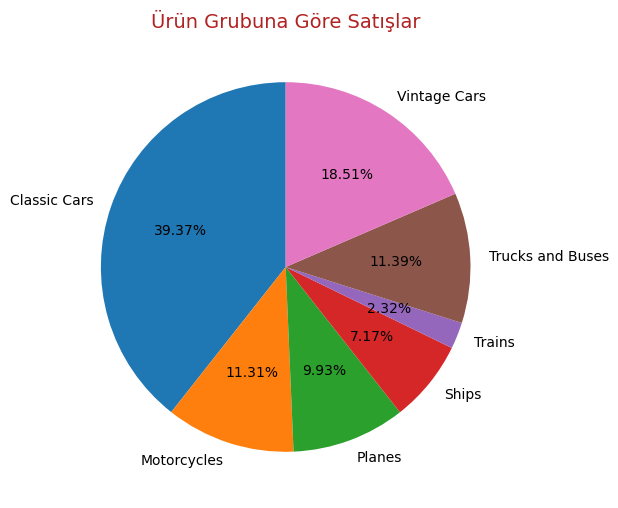

In [191]:
# Pasta grafiği oluşturma
plt.figure(figsize=(6, 6))

plt.pie(product_line_sales,
        labels=product_line_sales.index,
        autopct='%1.2f%%',
        startangle=90)

# Başlık ekleme
plt.title('Ürün Grubuna Göre Satışlar', fontdict= {'fontsize': 14, 'color': 'firebrick'})

# Grafiğin çıktı olarak gösterilmesi
plt.show()

Bu pasta grafiği, satışların farklı ürün kategorilerine göre dağılımını göstermektedir. Görüldüğü üzere **Klasik Otomobil** toplam satışlarda %39,37 ile en büyük paya sahiptir. Bunu %18,51 ile **Vintage Otomobil** ve %11,39 ile **Kamyon ve Otobüsler** takip ediyor. En düşük pay ise %2,32 ile "Trenler"e aittir. **Bu, klasik otomobillerin diğer ürün kategorilerine göre önemli ölçüde daha popüler olduğunu ve genel satışlarda baskın bir rol oynadığını gösteriyor.**

## <font color='indianred'> <b>En Çok Satılan 10 Ürün</b><font color='black'> 

In [194]:
top_selling_products = df.groupby('product_code')['quantity_ordered'].sum().nlargest(10)
top_selling_products

product_code
S18_3232     1754
S18_4600     1031
S700_4002    1029
S12_4473     1024
S24_3856     1017
S24_3949     1008
S50_1341      999
S24_2300      996
S18_2319      993
S700_2610     990
Name: quantity_ordered, dtype: int64

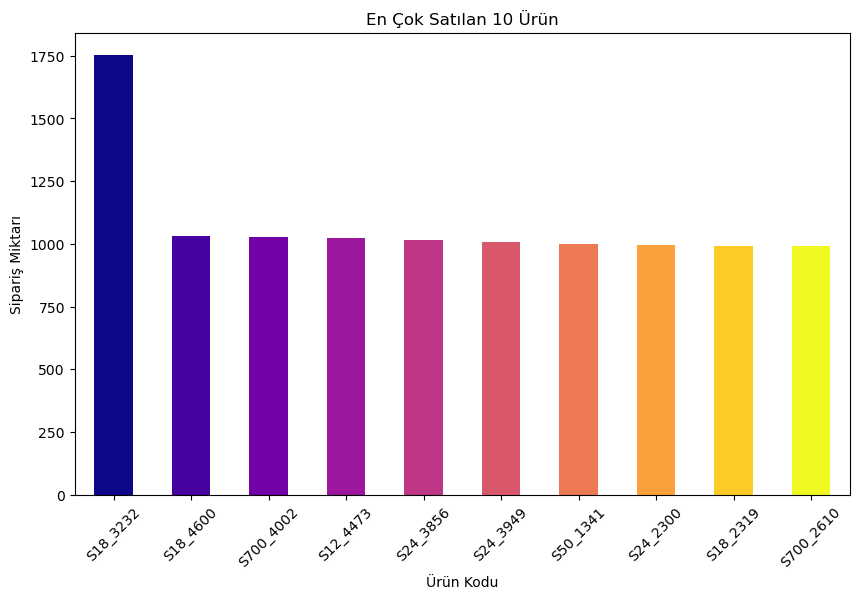

In [196]:
colors = cm.get_cmap('plasma', len(top_selling_products))

# Bar grafiği oluşturma
top_selling_products.plot(kind='bar', figsize=(10,6), color=colors(range(len(top_selling_products))))

# Başlık ve eksenlerin isimlendirilmesi
plt.title('En Çok Satılan 10 Ürün')
plt.xlabel('Ürün Kodu')
plt.ylabel('Sipariş Miktarı')
plt.xticks(rotation= 45)

# Grafiğin çıktı olarak gösterilmesi
plt.show()

En Çok Satılan 10 Ürün tablosunda **S18_3232** kodlu ürün diğerlerine göre önemli ölçüde öne çıkmaktadır. Bu ürün 1750 adetlik satışla ilk sırada yer alırken, geri kalan 9 ürünün her biri 1000 adetlik satışla eşit olarak dağılmakta ve S18_3232 ürününün en çok satanlar arasında açık ara satış lideri olduğunu göstermektedir. Bu durum, **S18_3232 ürünün daha yüksek talep gördüğünü, bir promosyonun parçası olduğunu veya onu rakiplerden ayıran farklı özelliklere sahip olduğunu** ima edebilmektedir. **Diğer ürünlerin eşit satışlara sahip olması, pazar dağılımı açısından nispeten dengeli olduklarını ve muhtemelen benzer bir müşteri tabanına hitap ettiklerini göstermektedir.**

## <font color='indianred'> <b>Son Siparişten Bu Yana Geçen Gün Sayısı</b><font color='black'> 

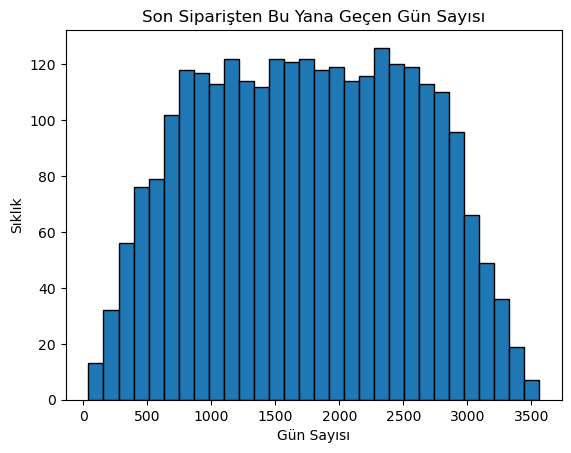

In [201]:
# Histogram grafiği oluşturma
plt.hist(df['days_since_lastorder'], bins=30, edgecolor='black')

# Başlık ve eksenlerin isimlendirilmesi
plt.title('Son Siparişten Bu Yana Geçen Gün Sayısı')
plt.xlabel('Gün Sayısı')
plt.ylabel('Sıklık')

# Grafiğin çıktı olarak gösterilmesi
plt.show()

Bu histogram, müşterilerin son siparişlerini vermesinden bu yana geçen günlerin dağılımını göstermektedir. Grafik yaklaşık 1000 ila 2500 gün arasında yoğun bir dağılım ortaya koymakta ve müşterilerin büyük bir kısmının son siparişlerini bu aralıkta verdiğini göstermektedir. Dağıtımın başında ve sonunda müşteri sayısı önemli ölçüde azalmaktadır. Bu dağılım, müşteri tabanının çoğunun zaman içinde aktif kaldığını göstermektedir.

**Genel olarak, bu raporda analiz edilen veriler, hem ürüne hem de bölgeye göre dikkate değer satış eğilimlerini ve müşteri davranışlarını ortaya çıkartmaktadır. Bu bilgiler gelecekteki satış stratejilerini optimize etmek için oldukça önemlidir.**

<p style="background-color:firebrick;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>TEŞEKKÜRLER!</b></p>